In [32]:
import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


def open_images(filename):

    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)

x_train = open_images("C:\\Users\\fabia\\Desktop\\Kurs\\Kursmaterialien\\data\\fashion\\train-images-idx3-ubyte.gz")
y_train = open_labels("C:\\Users\\fabia\\Desktop\\Kurs\\Kursmaterialien\\data\\fashion\\train-labels-idx1-ubyte.gz")

x_test = open_images("C:\\Users\\fabia\\Desktop\\Kurs\\Kursmaterialien\\data\\fashion\\t10k-images-idx3-ubyte.gz")
y_test = open_labels("C:\\Users\\fabia\\Desktop\\Kurs\\Kursmaterialien\\data\\fashion\\t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3,3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
model.fit(
    x_train.reshape(60000, 28, 28, 1),
    y_train,
    epochs=75,
    batch_size=1000
)

Epoch 1/75
60/60 [==============================] - 3s 47ms/step - loss: 1.2496 - accuracy: 0.5906
Epoch 2/75
60/60 [==============================] - 3s 47ms/step - loss: 0.7434 - accuracy: 0.7325
Epoch 3/75
60/60 [==============================] - 3s 48ms/step - loss: 0.6344 - accuracy: 0.7639
Epoch 4/75
60/60 [==============================] - 3s 50ms/step - loss: 0.5735 - accuracy: 0.7861
Epoch 5/75
60/60 [==============================] - 3s 53ms/step - loss: 0.5243 - accuracy: 0.8055
Epoch 6/75
60/60 [==============================] - 3s 55ms/step - loss: 0.4951 - accuracy: 0.8175
Epoch 7/75
60/60 [==============================] - 4s 59ms/step - loss: 0.4705 - accuracy: 0.8262
Epoch 8/75
60/60 [==============================] - 3s 55ms/step - loss: 0.4503 - accuracy: 0.8339
Epoch 9/75
60/60 [==============================] - 3s 55ms/step - loss: 0.4336 - accuracy: 0.8393
Epoch 10/75
60/60 [==============================] - 4s 59ms/step - loss: 0.4172 - accuracy: 0.8479
Epoch 11/

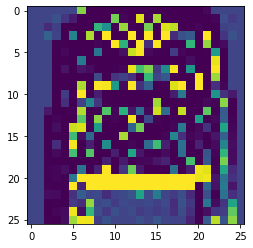

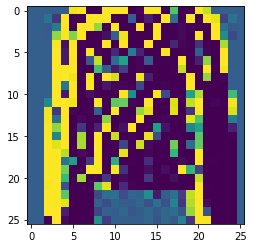

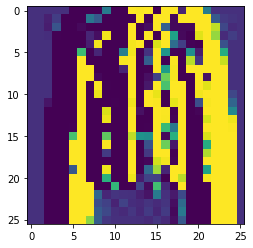

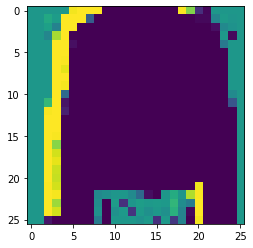

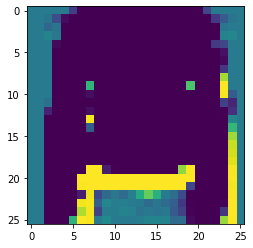

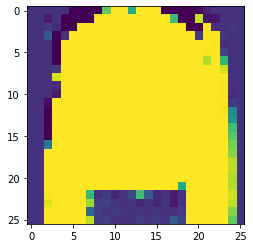

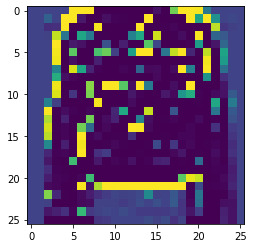

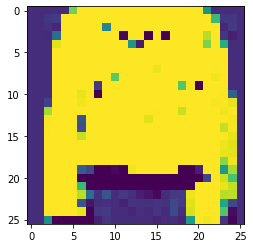

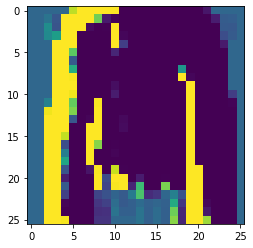

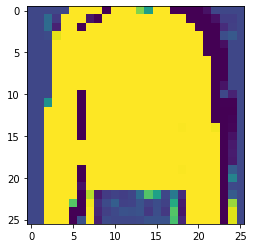

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

model2 = Sequential()

model2.add(Conv2D(10,
                    kernel_size=(3,3),
                    activation="sigmoid",
                    input_shape=(28,28,1),
                    weights=model.layers[0].get_weights()
))

result = model2.predict(x_test[10].reshape(1,28,28,1))

for i in range(10):
    plt.imshow(result[0][:,:,i])
    plt.show()


In [36]:
model.evaluate(x_test.reshape(-1, 28, 28), y_test)

313/313 [==============================] - 0s 966us/step - loss: 0.2889 - accuracy: 0.8965


[0.28888705372810364, 0.8964999914169312]